# Bitly Data from 1.USA.gov

## Giới thiệu

- Vào năm 2011, dịch vụ rút gọn URL Bitly đã hợp tác với trang web của chính phủ Hoa Kỳ – USA.gov để cung cấp một nguồn dữ liệu ẩn danh được thu thập từ người dùng khi họ rút gọn các liên kết có đuôi .gov hoặc .mil.

- Trong năm đó, luồng dữ liệu trực tiếp (live feed) cùng với các bản chụp dữ liệu theo giờ (hourly snapshots) đều được công bố công khai dưới dạng tệp văn bản có thể tải xuống.

- Hiện tại (tính đến năm 2022), dịch vụ này đã ngừng hoạt động, nhưng một trong các tệp dữ liệu gốc đã được lưu giữ lại để sử dụng làm ví dụ trong cuốn sách này.
- Phân tích này nhằm:
    + **Phân tích Địa lý:** Thông tin của chính phủ Mỹ được người dân ở đâu trên thế giới quan tâm nhất? (Bằng cách đếm số lần nhấp chuột theo quốc gia hoặc múi giờ).
    + **Phân tích Công nghệ:** Mọi người có xu hướng dùng thiết bị nào (Windows, Mac, điện thoại) để đọc tin tức chính phủ? Trình duyệt nào là phổ biến nhất?
    + **Phân tích Nguồn truy cập:** Kênh nào (Facebook, Google, v.v.) mang lại nhiều lượt truy cập nhất cho các trang web của chính phủ?
    + **Phân tích Xu hướng:** Đường link nào (thông tin nào) đang "hot" và được nhiều người nhấp vào nhất?

In [1]:
from numpy.random import randn
import numpy as np # numpy (tính toán số)
np.random.seed(123) 
import os
import matplotlib.pyplot as plt # matplotlib (trực quan hóa dữ liệu)
import pandas as pd # pandas (xử lý dữ liệu)
import seaborn as sns # seaborn (trực quan hóa dữ liệu)
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
# Thiết lập tùy chọn hiển thị của pandas để dễ đọc hơn
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [ ]:
path = "dataset/example.txt" # đường dẫn tới file dữ liệu mẫu

## Phân tích
- Tệp example.txt là một cuốn sổ nhật ký ghi lại các cú nhấp chuột (click) vào các đường link (liên kết) rút gọn.
- Các dịch vụ rút gọn link như bit.ly. Khi  thấy một link dài (ví dụ: http://www.nasa.gov/mission_pages/mars/main/index.html) và rút gọn nó thành bit.ly/MarsMission, thì mỗi khi ai đó nhấp vào cái link bit.ly/MarsMission đó, một bản ghi sẽ được tạo ra.
- Mỗi dòng trong mỗi tệp chứa một dạng dữ liệu web phổ biến được gọi là **JSON (JavaScript Object Notation).**
> **JSON (JavaScript Object Notation):** là một định dạng văn bản nhẹ, dễ đọc, dùng để trao đổi dữ liệu giữa máy chủ và ứng dụng web, cũng như trong nhiều ngôn ngữ lập trình khác. Nó cấu trúc dữ liệu thành các cặp khóa-giá trị (key-value) hoặc mảng, được máy tính hiểu và con người đọc được. 

In [3]:
# Đọc và in dòng đầu tiên của file mẫu
with open(path) as f: 
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



- Python có sẵn cả thư viện tích hợp (built-in) và thư viện của bên thứ ba (third-party) để chuyển đổi một chuỗi JSON (JSON string) thành **từ điển (dictionary)** trong Python.
> **Từ điển (dictionary):** Kiểu dictionary trong Python là một cấu trúc dữ liệu lưu trữ dữ liệu dưới dạng các cặp key-value (khóa-giá trị), không có thứ tự. Nó cho phép truy xuất giá trị một cách nhanh chóng bằng cách sử dụng khóa duy nhất của nó. Dictionary được định nghĩa bằng dấu ngoặc nhọn {} và là một cấu trúc dữ liệu có thể thay đổi (mutable). 

- Trong ví dụ này, ta sẽ sử dụng mô-đun json có sẵn trong Python, cùng với hàm loads(), để đọc và chuyển đổi từng dòng trong tệp dữ liệu mẫu mà chúng ta đã tải về.

In [4]:
import json # json (xử lý dữ liệu JSON)
# Đọc toàn bộ file JSON vào danh sách các bản ghi
with open(path) as f:
    records = [json.loads(line) for line in f]

Kết quả

In [5]:
records[0] # xem dòng đầu tiên trong tệp dữ liệu

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

- Ý nghĩa tập dữ liệu:
    + **a (User Agent):** Họ dùng thiết bị gì? (Thông tin này cho biết họ đang dùng trình duyệt Chrome hay Firefox, hệ điều hành Windows hay Mac/iPhone). Mozilla/5.0 (Windows NT 6.1...) cho chúng ta biết người này đang dùng trình duyệt Chrome 17 trên hệ điều hành Windows 7 (NT 6.1).
    + **c Country Code** (Mã quốc gia (theo chuẩn **ISO**) của người nhấp chuột. US là viết tắt của United States (Hoa Kỳ).)
    > **ISO:**  Tiêu chuẩn ISO về mã quốc gia chính là ISO 3166 — đây là bộ tiêu chuẩn quốc tế quy định các mã dùng để biểu diễn tên quốc gia và vùng lãnh thổ.
    + **nk: "Not Known" (Không xác định).** Là cờ (flag) cho biết người dùng có đăng nhập vào Bitly hay không. 1 có thể là đã đăng nhập (hoặc Bitly có thể nhận diện được), 0 là ẩn
    + **tz Timezone (Múi giờ):** Múi giờ của người dùng. America/New_York (múi giờ Bờ Đông Hoa Kỳ).
    + **gr Geographic Region (Vùng địa lý):** Mã vùng địa lý hoặc tiểu bang. MA là viết tắt của Massachusetts, một tiểu bang ở Mỹ.
    + **g Global Hash (Mã rút gọn toàn cầu):** Đây là một "mã băm" (hash) toàn cầu mà Bitly dùng để nhận dạng duy nhất đường link gốc (u). A6qOVH là mã định danh của link http://www.ncbi.nlm.nih.gov/pubmed/22415991.
    + **h User Hash (Mã rút gọn của người dùng):** Đây cũng là một "mã băm" (hash) nhưng là mã mà người dùng (l) đã tạo ra. wfLQtf chính là phần mã trong link rút gọn: 1.usa.gov/wfLQtf.
    + **l Login Name (Tên người dùng Bitly):** Tên tài khoản Bitly của người đã tạo ra đường link rút gọn này. Ở đây là người dùng có tên orofrog.
    + **al Accept-Language Header (Ngôn ngữ chấp nhận):** Ngôn ngữ mà trình duyệt của người dùng ưu tiên. en-US,en;q=0.8 nghĩa là ưu tiên số 1 là "Tiếng Anh-Mỹ" (en-US), ưu tiên số 2 là "Tiếng Anh" bất kỳ (en).
    + **hh Host (Tên miền rút gọn):** Tên miền (domain) rút gọn đã được sử dụng. Trong trường hợp này là 1.usa.gov (tên miền tùy chỉnh của chính phủ Mỹ), không phải bit.ly thông thường.
    + **r Referrer URL (URL giới thiệu):** Nguồn giới thiệu. Cho biết người dùng đã tìm thấy link này ở đâu trước khi nhấp vào. Ở đây, http://www.facebook.com/... có nghĩa là họ đã nhấp vào link này từ Facebook.
    + **u Long URL (URL gốc, chưa rút gọn):** Đường link gốc (link dài, link "đích") mà người dùng sẽ được chuyển đến sau khi nhấp vào link rút gọn.
    + **t Timestamp (Thời gian nhấp chuột):** Dấu thời gian (theo chuẩn Unix) ghi lại chính xác khi nào cú nhấp chuột xảy ra (vào lúc 1331923247 giây kể từ 1/1/1970).
    + **hc Hash Created:** Dấu thời gian (Timestamp) khi đường link rút gọn (h) này được tạo ra.
    + **cy City Name (Tên thành phố):** Thành phố. Danvers (một thành phố ở bang Massachusetts).
    + **ll Latitude & Longitude (Vĩ độ & Kinh độ):** Tọa độ địa lý (Vĩ độ và Kinh độ) của thành phố. [42.576698, -70.954903].

## Phân tích mô tả

- Phân tích mô tả
    + Các múi giờ (tz) nào có số lượt truy cập cao nhất?
    + Có bao nhiêu người dùng thiếu thông tin múi giờ hoặc quốc gia?
    + Những nguồn referrer (r) phổ biến nhất là gì (Facebook, Twitter, Google, v.v.)?


### Các múi giờ có số lượt truy cập cao nhất


#### Counting Time Zones in Pure Python

- Giả sử chúng ta muốn tìm ra các múi giờ (time zones) xuất hiện thường xuyên nhất trong tập dữ liệu — tức là trường tz (time zone) trong mỗi bản ghi
- Có nhiều cách để thực hiện việc này, nhưng đầu tiên, ta sẽ trích xuất danh sách các múi giờ từ dữ liệu bằng list comprehension trong Python.

In [ ]:
time_zones = [rec["tz"] for rec in records] # trích xuất danh sách các múi giờ từ dữ liệu gặp lỗi nếu không có trường "tz" trong rec

KeyError: 'tz'

> Lý do lỗi là vì không phải tất cả các bản ghi đều có trường múi giờ. Chúng ta có thể xử lý vấn đề này bằng cách thêm lệnh check if "tz" trong rec vào cuối phần đọc hiểu danh sách:

In [ ]:
time_zones = [rec["tz"] for rec in records if "tz" in rec] # thêm điều kiện kiểm tra "tz" trong rec
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

- Khi xem qua 10 múi giờ đầu tiên, ta thấy rằng một số giá trị bị thiếu hoặc không xác định (ví dụ: chuỗi rỗng "").
Ta hoàn toàn có thể lọc bỏ các giá trị này, nhưng tạm thời giữ nguyên để quan sát toàn bộ dữ liệu.

- Tiếp theo, để thống kê số lần xuất hiện của từng múi giờ, ta sẽ trình bày hai cách tiếp cận:
    - Cách thứ nhất (khó hơn) — chỉ sử dụng thư viện chuẩn của Python (Python Standard Library).
    - Cách thứ hai (đơn giản hơn) — sử dụng thư viện pandas.

In [ ]:
def get_counts(sequence): # đếm số lần xuất hiện của từng mục trong chuỗi
    counts = {} # từ điển để lưu trữ kết quả đếm
    for x in sequence:
        if x in counts: # nếu mục đã tồn tại trong từ điển, tăng giá trị đếm lên 1
            counts[x] += 1
        else: # nếu mục chưa tồn tại, khởi tạo giá trị đếm là 1
            counts[x] = 1
    return counts

Sử dụng các công cụ nâng cao hơn trong thư viện chuẩn Python, bạn có thể viết lại nội dung tương tự một cách ngắn gọn hơn:

In [ ]:
from collections import defaultdict # defaultdict (từ điển với giá trị mặc định)

def get_counts2(sequence): # đếm số lần xuất hiện của từng mục trong chuỗi sử dụng defaultdict
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

- Gọi hàm

In [11]:
counts = get_counts(time_zones)
print(counts["Europe/Madrid"])
print(counts["America/Sao_Paulo"])
print(counts)

35
33
{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonto

In [21]:
counts1 = get_counts2(time_zones)
print(counts1["Europe/Madrid"])

35


- Nếu chúng ta muốn biết 10 múi giờ hàng đầu và số lượng của chúng, chúng ta có thể tạo một danh sách các bộ dữ liệu theo
(số lượng, múi giờ) và sắp xếp nó:

In [12]:
def top_counts(count_dict, n=10): # tìm n mục có số lần xuất hiện cao nhất trong từ điển đếm
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()] # tạo danh sách các cặp (giá trị, khóa)
    value_key_pairs.sort() # sắp xếp danh sách theo giá trị
    return value_key_pairs[-n:] # trả về n mục có giá trị cao nhất

- Kết quả

In [13]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

- Phân tích:
    + America/New_York là múi giờ có số lượt truy cập áp đảo, với 1251 lượt, chiếm khoảng 35% tổng số (1251 / 3560). Điều này hoàn toàn hợp lý vì đây là dữ liệu từ trang usa.gov (chính phủ Mỹ) và múi giờ này bao gồm các trung tâm dân cư lớn ở Bờ Đông Hoa Kỳ.

    + Dữ liệu nhiễu (Noisy Data) rất đáng kể: Có tới 521 lượt truy cập được ghi nhận là "" (chuỗi rỗng). Tổng cộng  nhóm này chiếm tới 521 lượt, đứng vị trí thứ hai.

    + Các múi giờ còn lại trong top 5 đều thuộc Hoa Kỳ (Chicago, Los Angeles, Denver), khẳng định rằng đối tượng chính của dữ liệu này là người dùng trong nước Mỹ.

    + Europe/London là múi giờ quốc tế phổ biến nhất, nhưng với số lượng khá nhỏ (74 lượt).

- Nếu bạn tìm kiếm trong thư viện chuẩn Python, bạn có thể tìm thấy lớp collections.Counter
giúp nhiệm vụ này trở nên đơn giản hơn:

In [28]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

> Kết quả khá tương đồng nhưng code gọn hơn rất nhiều.

#### Counting Time Zones with pandas

- Bạn có thể tạo DataFrame từ tập hợp bản ghi gốc bằng cách truyền danh sách
bản ghi cho pandas.DataFrame:

In [6]:
frame = pd.DataFrame(records)

- Bạn có thể xem được những thông tin cơ bản của tập dataframe chẳng hạng như cột, tên, kiểu dữ liệu của cột, giá trị null

In [16]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

- Đầu ra được hiển thị cho khung là chế độ xem tóm tắt, được hiển thị cho các đối tượng DataFrame lớn. Sau đó, chúng ta có thể sử dụng phương thức value_counts cho Series:

In [17]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

### Có bao nhiêu người dùng thiếu thông tin múi giờ hoặc quốc gia?

In [18]:
# Đếm thiếu múi giờ (Cả NaN và chuỗi rỗng "")
missing_tz_count = (frame['tz'].isna() | (frame['tz'] == "")).sum()
print(f"Số lượt truy cập thiếu thông tin múi giờ (tz): {missing_tz_count}")

Số lượt truy cập thiếu thông tin múi giờ (tz): 641


In [19]:
# Đếm thiếu quốc gia (Cả NaN và chuỗi rỗng "")
missing_c_count = (frame['c'].isna() | (frame['c'] == "")).sum()
print(f"Số lượt truy cập thiếu thông tin quốc gia (c): {missing_c_count}")

Số lượt truy cập thiếu thông tin quốc gia (c): 641


- Phân tích:
    + Trong tổng số 3560 bản ghi, có 641 lượt truy cập bị thiếu thông tin múi giờ (tz). Con số này khá đáng kể chiếm khoảng ~ 18% trên toàn tập dataset

    + Tương tự, có 641 lượt truy cập bị thiếu thông tin quốc gia (c).

    + Insight thú vị: Con số 641 này giống hệt nhau cho cả hai trường. Điều này gợi ý mạnh mẽ rằng đây không phải là lỗi ngẫu nhiên, mà rất có thể là cùng một nhóm người dùng/bản ghi bị thiếu cả hai thông tin tz và c cùng một lúc (ví dụ: do một loại trình duyệt, bot, hoặc cài đặt quyền riêng tư nào đó đã chặn gửi cả hai thông tin này).

### Những nguồn referrer (r) phổ biến nhất là gì?

Cột r (viết tắt của Referrer - Nguồn giới thiệu) cho biết người dùng đã đến từ trang web nào (ví dụ: họ nhấp vào link từ Google, hay từ Facebook). 

In [38]:
# Xem xét các giá trị trong cột 'r'
frame['r'].head()

0    http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf
1                                http://www.AwareMap.com/
2                                    http://t.co/03elZC4Q
3                                                  direct
4                     http://www.shrewsbury-ma.gov/selco/
Name: r, dtype: object

-> Là những url thông thường. Nhưng có 1 giá trị không phải url.

In [39]:
frame['r'].unique()

array(['http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
       'http://www.AwareMap.com/', 'http://t.co/03elZC4Q', 'direct',
       'http://www.shrewsbury-ma.gov/selco/',
       'http://plus.url.google.com/url?sa=z&n=1331923253510&url=http%3A%2F%2F1.usa.gov%2FzkpJBR&usg=TF5iGSqK1_GSADtHqTqjuUZyMIY.',
       'http://www.facebook.com/',
       'http://www.facebook.com/l.php?u=http%3A%2F%2F1.usa.gov%2FzkpJBR&h=fAQG5ntSGAQHqKPlWzuJKUA9LYeckHZCUxvjQipJDd7Rmmw',
       'http://t.co/o1Pd0WeV', 'http://t.co/ND7SoPyo', nan,
       'http://forum2.hkgolden.com/view.aspx?type=BW&message=3602284',
       'http://t.co/6Cx4ROLs',
       'http://www.facebook.com/l.php?u=http%3A%2F%2F1.usa.gov%2FwWiOiD&h=MAQERI5fLAQFvFg3Jhes38U64waF7QclFtZlHG4yEVpkTSA',
       'http://www.facebook.com/?ref=tn_tnmn', 'http://t.co/5xlp0B34',
       'http://plus.url.google.com/url?sa=z&n=1331923308907&url=http%3A%2F%2F1.usa.gov%2FzkpJBR&usg=aqYZtNlwKGwBPD7VQg2AGSQUmIE.',
       'http://www.facebook.com/l.php?u=http

- Khi tiếp tục xem cét unique ta thấy có trường direct và nan (giá trị đặc biệt np.nan,  missing value theo chuẩn NumPy.)

In [37]:
(frame['r'] == "direct").sum()

np.int64(1585)

Trường direct là gì?. 
- Đây là trường do hệ thống máy chủ của Bitly đã chủ động gán giá trị này trong quá trình ghi lại nhật ký (logging).
    1. Ghi nhận "Referrer"
    Khi trình duyệt (Chrome, Firefox...) truy cập một đường link, nó sẽ gửi một yêu cầu đến máy chủ (trong trường hợp này là máy chủ Bitly). Kèm theo yêu cầu đó, trình duyệt có thể gửi một tiêu đề (HTTP Header) tên là Referer để báo cho máy chủ biết "tôi đến từ đâu".
    2. Direct. Điều này xảy ra chủ yếu khi:
        - 2.1. Người dùng gõ thẳng địa chỉ (ví dụ 1.usa.gov/...) vào thanh địa chỉ của trình duyệt.

        - 2.2. Người dùng nhấp vào một link đã lưu (Bookmark).

        - 2.3. Người dùng nhấp vào link từ một ứng dụng (như email, Zalo, Teams).

        - 2.4. Người dùng có cài đặt bảo mật/quyền riêng tư chặn gửi thông tin referrer.
> -> Trong tất cả các trường hợp này, hành vi chung được gọi là truy cập "Trực tiếp" (Direct traffic).

In [34]:
missing_r_count = (frame["r"].isnull()).sum()
int(missing_r_count)

120

> Dữ liệu bị thiếu: Có 120 giá trị null (thiếu).
- Đây là hành vi không mong muốn (lỗi). Có thể do một lý do nào đó mà nó không được ghi lại. 
- Tuy nhiên, về mặt ngữ nghĩa, chúng ta có thể suy luận rằng 120 trường hợp này rất có thể cũng là truy cập trực tiếp.
-> Vì vậy có thể fill trường này lại bằng direct

In [33]:
missing_r_count2 = (frame["r"] == "").sum()
int(missing_r_count2)

0

> Không có giá trị ""

- Dữ liệu url đầy đủ

In [35]:
frame['r'].value_counts().head(10)

r
direct                                                1585
http://www.facebook.com/                               132
http://www.AwareMap.com/                               121
http://www.shrewsbury-ma.gov/selco/                     64
http://t.co/UKGBxj29                                    54
http://togetter.com/li/39380                            29
https://twitter.com/nasa/status/180662400964493314      26
http://yandex.ru/yandsearch?text=1.usa.gov&lr=213       19
http://t.co/9JWO28CZ                                    17
http://t.co/0zpWSx8z                                    16
Name: count, dtype: int64

- Dữ liệu không nhất quán:
    + Có http://www.facebook.com
    + Có http://www.AwareMap.com/
    + Có http://m.facebook.com (bản mobile)
> -> Mục tiêu phân tích: Chúng ta không quan tâm đến toàn bộ đường link dài (/l...). Chúng ta chỉ muốn biết tên miền gốc (domain) đã giới thiệu người dùng, ví dụ: facebook.com, twitter.com, google.com.

In [9]:
# Làm sạch cột 'r'
clean_r = frame['r'].fillna("direct")
clean_r[clean_r == ""] = "direct"

- Vậy việc fill trường na bằng Direct có ý nghĩa: Feature Engineering (Tạo đặc trưng): Chúng ta biến một giá trị bị thiếu (NaN) thành một hạng mục (category) có ý nghĩa kinh doanh (Direct).
- Điều này giúp chúng ta phân biệt rõ ràng khi phân tích:

    + Bao nhiêu người đến từ Google?

    + Bao nhiêu người đến từ Facebook?

    + Và bao nhiêu người tự tìm đến (Direct)?

- Tiến hành tách tên miền:
    + Dữ liệu là URL đầy đủ, quá chi tiết. Chúng ta nên rút gọn url gốc http://www.facebook.com/l/7AQE... thành www.facebook.com.
    + Dùng một thư viện chuyên dụng để "tách" các phần của một URL.

In [7]:
from urllib.parse import urlparse
# Hàm để trích xuất tên miền (netloc) và gom nhóm
def get_domain(url_string):
    if url_string == "Direct":
        return "Direct"
    try:
        if '://' not in url_string: # nếu chuỗi không chứa '://', thêm 'http://' vào đầu chuỗi
            url_string = 'http://' + url_string
        
        parsed_url = urlparse(url_string) # phân tích cú pháp URL. Ví dụ url_string = 'http://www.facebook.com/l/7AQE...' sẽ trả về parsed_url.netloc = 'www.facebook.com'
        domain = parsed_url.netloc
        if domain.startswith('www.'): # loại bỏ tiền tố 'www.' Lý do là vì nhiều trang web có cả hai phiên bản với và không có www, ví dụ: www.facebook.com và facebook.com. Để thống nhất và tránh việc coi hai tên miền này là khác nhau, ta loại bỏ tiền tố 'www.'.
            domain = domain[4:]
        
        # Các tên miền ẩn 
        """ 
            Khi xem dữ liệu, chúng ta thấy rất nhiều t.co. 
            Kinh nghiệm cho biết đây là dịch vụ rút gọn link của Twitter. 
            Nếu chỉ lấy t.co thì kết quả phân tích sẽ không rõ ràng.
            Ý tưởng: Tạo một quy tắc (rule) đặc biệt để gom nhóm.
         """
        if domain == 't.co': # nếu domain là t.co, trả về twitter.com
            return 'twitter.com'
        # Các tên miền phụ (Subdomains) và tên miền quốc gia.
        """ 
        Trong tập dữ liệu chúng ta thấy m.facebook.com, l.facebook.com, facebook.com. 
        Tương tự google.com, google.ca, google.co.uk, plus.url.google.com.
        -> Tất cả chúng nên được gom lại. m.facebook.com nên là facebook.com. google.ca nên là google.com.
         """
        if 'facebook.com' in domain: 
            return 'facebook.com'
        if 'google' in domain:
            return 'google.com'
            
        return domain
    except Exception:
        return "Invalid/Other"

In [10]:
domains = clean_r.apply(get_domain)
domain_counts = domains.value_counts()
print("Top 10 nguồn giới thiệu (referrer) hàng đầu:")
print(domain_counts.head(10))

Top 10 nguồn giới thiệu (referrer) hàng đầu:
r
direct               1705
twitter.com           677
facebook.com          548
AwareMap.com          121
shrewsbury-ma.gov      90
google.com             47
togetter.com           29
yandex.ru              23
aashtojournal.org      21
barackobama.com        18
Name: count, dtype: int64


- Phân tích:
    + **Truy cập trực tiếp (Direct):** Nguồn direct và Direct (tổng cộng 1585 + 120 = 1705 lượt) là lớn nhất. Điều này có nghĩa là người dùng đã gõ thẳng địa chỉ 1.usa.gov/... vào trình duyệt, hoặc nhấp từ bookmark, hoặc từ một ứng dụng (như email) mà trình duyệt không ghi nhận là nguồn giới thiệu.

    + **Mạng xã hội:** Twitter (twitter.com, được gom từ t.co) là nguồn mạng xã hội lớn nhất với 677 lượt, theo sau là Facebook (facebook.com) với 548 lượt. Điều này cho thấy mạng xã hội là kênh chia sẻ thông tin chính phủ rất quan trọng.

    + ***Nguồn cụ thể:*** AwareMap.com (121 lượt) và shrewsbury-ma.gov (90 lượt) là các trang web cụ thể có lượng truy cập đáng kể. shrewsbury-ma.gov có thể là trang web của một thị trấn (Shrewsbury, Massachusetts) đã chia sẻ link usa.gov.

    + ***Công cụ tìm kiếm:*** google.com (47 lượt) và yandex.ru (23 lượt - công cụ tìm kiếm của Nga) cũng xuất hiện, nhưng với tỷ lệ thấp hơn nhiều so với mạng xã hội. Điều này cho thấy người dùng chủ yếu phát hiện các link này qua chia sẻ xã hội hơn là tìm kiếm chúng.

## Trực quan hóa dữ liệu

- Chúng ta có thể trực quan hóa dữ liệu này bằng thư viện matplotlib.
- Để biểu đồ trông trực quan và rõ ràng hơn, ta cần xử lý trước (data cleaning) những giá trị múi giờ bị thiếu hoặc không xác định trong dữ liệu.

- Cụ thể, ta sẽ thay thế các giá trị bị thiếu (NaN) bằng một giá trị thay thế (ví dụ "Missing") thông qua phương thức fillna(),
- và dùng Boolean indexing để xử lý các chuỗi rỗng ("") — tức là những bản ghi có trường tz nhưng không có nội dung.

In [42]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [46]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [33]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

- Tại thời điểm này, chúng ta có thể sử dụng gói seaborn để tạo biểu đồ thanh ngang:

<Axes: ylabel='tz'>

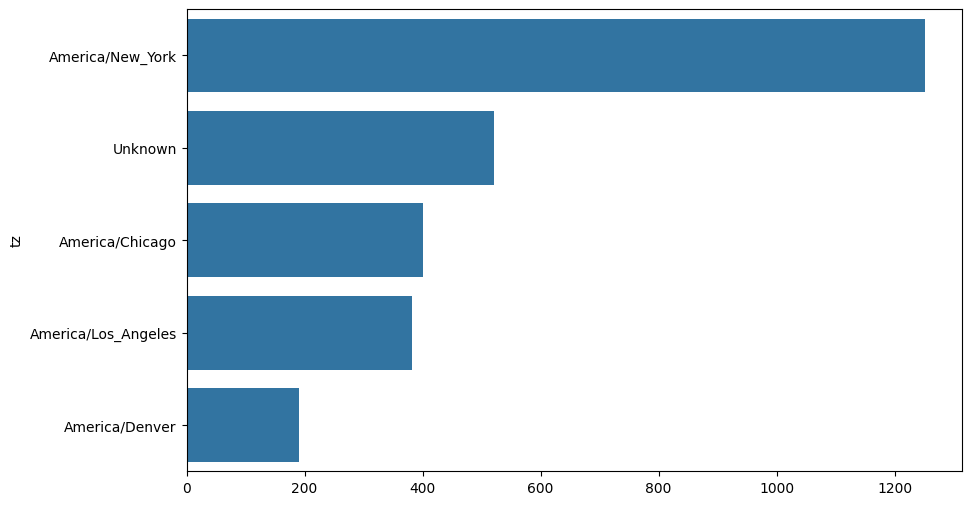

In [34]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

## Phân tích tương quan
Phân tích tương quan (Correlation Analysis) là một phương pháp thống kê dùng để đo lường mức độ mạnh yếu và chiều hướng của mối quan hệ tuyến tính giữa hai biến số (variable).

### Tỷ lệ người dùng Windows vs Non-Windows

Việc phân tích tỷ lệ người dùng Windows so với Non-Windows sẽ dựa trên trường a (User Agent):
1. Trích xuất thông tin hữu ích từ dữ liệu thô:
    + Cột a chứa chuỗi "User Agent" - một đoạn văn bản dài và phức tạp, ghi lại thông tin về trình duyệt, hệ điều hành (OS), và đôi khi cả thiết bị của người dùng.
    Phân tích này giúp "bóc tách" một thông tin cụ thể và quan trọng từ chuỗi đó: Hệ điều hành người dùng đang sử dụng.
2. Hiểu rõ hơn về đối tượng người dùng:
    + Biết được tỷ lệ người dùng Windows so với các hệ điều hành khác (Mac, Linux, iOS, Android - gộp chung là Non-Windows) giúp hiểu công nghệ mà người truy cập các link usa.gov đang dùng.
    + Thông tin này có thể hữu ích cho việc thiết kế trang web (ví dụ: tối ưu cho Windows hay cần chú trọng cả nền tảng khác?), kiểm thử tương thích, hoặc hoạch định hỗ trợ kỹ thuật.


In [35]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

- Việc phân tích (parsing) toàn bộ thông tin thú vị trong các chuỗi “agent” (tức là User-Agent strings) có thể trông khá phức tạp — vì mỗi chuỗi chứa nhiều thông tin chi tiết về trình duyệt, hệ điều hành, thiết bị, phiên bản, v.v.

- Một chiến lược khả thi để đơn giản hóa là tách (split) token đầu tiên trong chuỗi, vì phần này thường biểu thị loại trình duyệt hoặc khả năng của trình duyệt (browser capability).
Sau đó, ta có thể tạo một bảng tóm tắt (summary) khác để phân tích hành vi người dùng dựa trên loại trình duyệt.

In [43]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()]) # trích xuất hệ điều hành từ chuỗi User Agent
results.head(5) # xem 5 dòng đầu tiên của results
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

- Bây giờ, giả sử bạn muốn phân tách (decompose) theo loại người dùng và các múi giờ phổ biến nhất (top time zones) theo hai nhóm người dùng:
    - Người dùng Windows, và
    - Người dùng không phải Windows (non-Windows).
- Để đơn giản hóa, ta giả định rằng một người dùng được xem là đang dùng Windows nếu trong chuỗi “agent” (user agent string) có chứa từ “Windows”.

- Vì một số bản ghi không có thông tin “agent”, nên ta sẽ loại bỏ (exclude) các bản ghi này khỏi dữ liệu trước khi phân tích.

In [44]:
cframe = frame[frame["a"].notna()].copy()

- Sau đó, chúng ta muốn tính toán giá trị để xác định xem mỗi hàng có phải là Windows hay không:

In [45]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

- Tỉ lệ người dùng Windows so với Not Windows. 

In [46]:
cframe["os"].value_counts()

os
Windows        2246
Not Windows    1194
Name: count, dtype: int64

Tổng số lượt: 2246 + 1194 = 3440 lượt.
- Tỷ lệ Windows: (2246 / 3440) * 100 ≈ 65.29%
- Tỷ lệ Not Windows: (1194 / 3440) * 100 ≈ 34.71%
Phân tích:
    Kết quả này xác nhận rằng phần lớn người dùng (khoảng 65%) trong tập dữ liệu này đã truy cập các link sử dụng hệ điều hành Windows. Tuy nhiên, tỷ lệ người dùng Non-Windows (khoảng 35%) cũng rất đáng kể, cho thấy sự đa dạng về nền tảng công nghệ của những người quan tâm đến thông tin từ usa.gov vào thời điểm đó.

### Phân bố hệ điều hành khác nhau theo múi giờ.

- Sau đó, bạn có thể nhóm dữ liệu theo cột múi giờ và danh sách hệ điều hành mới này:

In [48]:
by_tz_os = cframe.groupby(["tz", "os"])

- Số lượng nhóm, tương tự như hàm value_counts, có thể được tính bằng
size. Kết quả này sau đó được định dạng lại thành một bảng với unstack:

In [49]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


- Kết quả này cho thấy 5 múi giờ đầu tiên (theo thứ tự bảng chữ cái, bắt đầu từ Châu Phi) và số lượng người dùng tương ứng:

    + Africa/Cairo: 0 người dùng được xác định là "Not Windows", 3 người dùng được xác định là "Windows".

    + Africa/Casablanca: 0 "Not Windows", 1 "Windows".

    + Africa/Ceuta: 0 "Not Windows", 2 "Windows".

    + Africa/Johannesburg: 0 "Not Windows", 1 "Windows".

    + Africa/Lusaka: 0 "Not Windows", 1 "Windows".

Quan sát ban đầu: Đối với các múi giờ Châu Phi cụ thể này trong tập dữ liệu, tất cả người dùng được ghi nhận đều sử dụng Windows. Tuy nhiên, cần lưu ý rằng số lượng rất thấp, vì vậy điều này có thể không đại diện cho một xu hướng rộng rãi.

- Tiếp tục, chúng ta sẽ chọn ra các múi giờ (time zones) có tổng số người dùng cao nhất trong toàn bộ dữ liệu.

- Để làm điều này, ta sẽ tạo một mảng chỉ số gián tiếp (indirect index array) dựa trên số lượng bản ghi (row counts) trong bảng tổng hợp agg_counts.
- Sau khi tính tổng số bản ghi của từng múi giờ bằng cách gọi agg_counts.sum("columns"), ta có thể sử dụng phương thức argsort() để lấy ra một mảng chỉ số sắp xếp các giá trị theo thứ tự tăng dần.

In [50]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

- Sử dụng lệnh take để chọn các hàng theo thứ tự đó, sau đó cắt bỏ 10 hàng cuối cùng (giá trị lớn nhất):

In [51]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Nhận Xét Ban Đầu:
- Múi giờ phổ biến nhất: Thuộc về múi giờ America/New_York, cho thấy đây là khu vực có lượng truy cập cao nhất trong top 10 này. Theo sau đó là múi giờ "" (Unknown/Không xác định), America/Chicago, và America/Los_Angeles.
- Tỉ lệ của Windows: Trong hầu hết các múi giờ được hiển thị (đặc biệt là các múi giờ lớn ở Mỹ như New York, Chicago, Los Angeles) Windows chiếm tỷ lệ lớn hơn so với phần Not Windows. Điều này củng cố kết luận rằng đa số người dùng trong tập dữ liệu này sử dụng Windows.
- Sự khác biệt theo khu vực:

    + Tỷ lệ Non-Windows cao: Múi giờ Europe/London và America/Denver dường như có tỷ lệ người dùng Non-Windows (màu cam) tương đối cao hơn so với các múi giờ khác trong top 10.

    + Tỷ lệ Windows rất cao: Múi giờ như Pacific/Honolulu và Asia/Tokyo gần như hoàn toàn là người dùng Windows.
- Dữ liệu không xác định: Múi giờ "" (Unknown) có số lượng truy cập đáng kể và tỷ lệ giữa Windows và Non-Windows khá cân bằng hơn so với America/New_York.

In [44]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

- Sau đó, chúng ta có thể trực quan hóa kết quả bằng biểu đồ cột nhóm (grouped bar plot) để so sánh số lượng người dùng Windows và Non-Windows trong từng múi giờ.
- Để thực hiện việc này, ta sẽ sử dụng hàm barplot() của thư viện seaborn (tham khảo Hình 13-2 trong sách).
Trước khi vẽ, ta cần chuẩn bị lại cấu trúc dữ liệu sao cho phù hợp với định dạng đầu vào của seaborn.

- Cụ thể, ta sẽ gọi:
    - count_subset.stack() để chuyển các cột hệ điều hành (Windows / Non-Windows) thành dạng hàng (rows),
rồi dùng reset_index() để đưa các nhãn cột và chỉ số thành các cột dữ liệu thực tế, giúp seaborn dễ dàng nhận biết các trường khi vẽ.

<Axes: xlabel='total', ylabel='tz'>

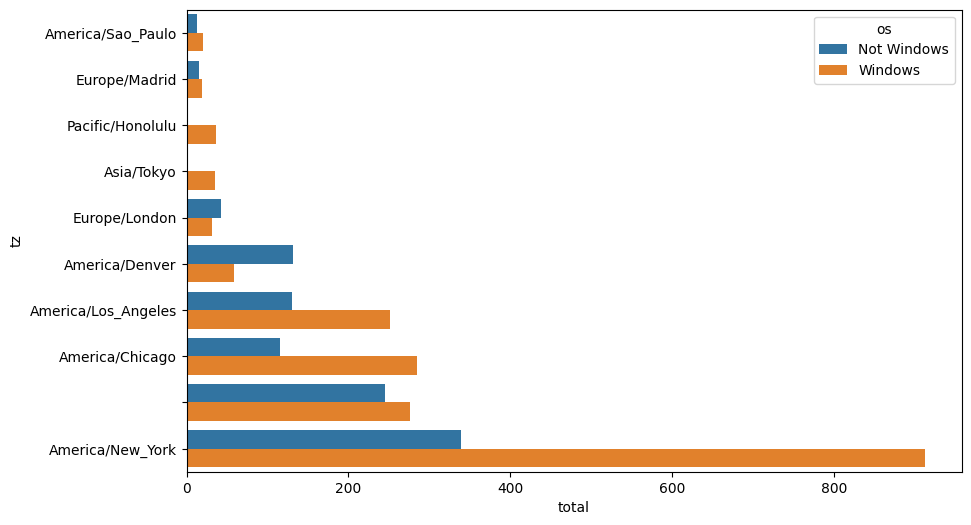

In [45]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

Việc xem xét tỷ lệ phần trăm tương đối của người dùng Windows trong các nhóm nhỏ hơn khá khó khăn, vì vậy hãy chuẩn hóa tỷ lệ phần trăm của các nhóm thành tổng bằng 1:

In [46]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

C:\Users\kn260\AppData\Local\Temp\ipykernel_20132\1595230757.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


In [47]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='normed_total', ylabel='tz'>

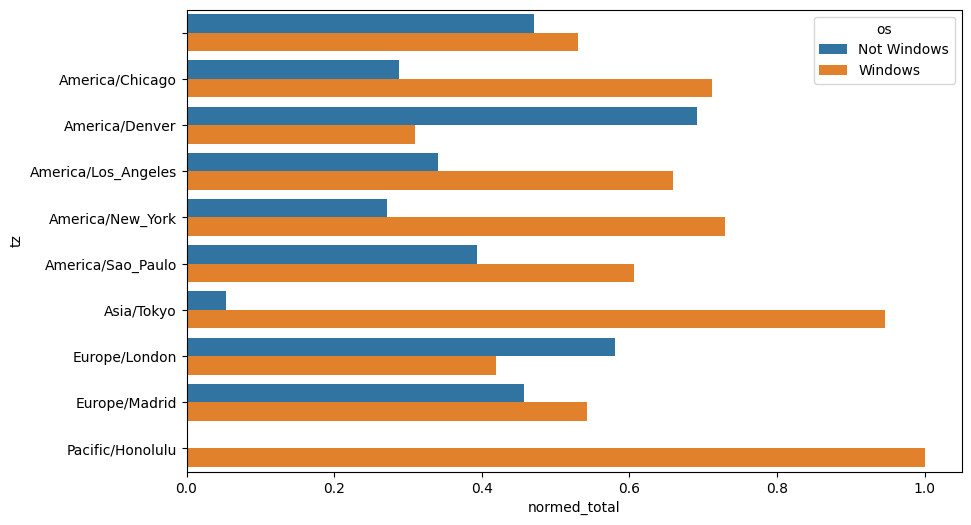

In [48]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [49]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

## Phân tích Hành vi Thời gian

### Khung giờ (theo t) nào có lượng truy cập cao nhất?

Để phân tích khung giờ truy cập, chúng ta cần chuyển đổi cột timestamp t sang định dạng datetime và sau đó trích xuất giờ trong ngày.

In [7]:
frame["t"].head()

0    1.331923e+09
1    1.331923e+09
2    1.331923e+09
3    1.331923e+09
4    1.331923e+09
Name: t, dtype: float64

- Các giá trị **1.331923e+09** là dấu thời gian Unix (Unix timestamp), thường biểu thị số giây kể từ ngày 1 tháng 1 năm 1970 (Epoch), được lưu dưới dạng số thực (float) và hiển thị ở dạng khoa học.

In [17]:
valid_time_clicks = frame.dropna(subset=['t']) # loại bỏ các dòng có giá trị NaN trong cột 't'
valid_time_clicks['click_datetime'] = pd.to_datetime(valid_time_clicks['t'], unit='s') # chuyển đổi cột 't' sang định dạng datetime

C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\3906498394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_time_clicks['click_datetime'] = pd.to_datetime(valid_time_clicks['t'], unit='s') # chuyển đổi cột 't' sang định dạng datetime


In [ ]:
valid_time_clicks["click_datetime"].head()

0   2012-03-16 18:40:47
1   2012-03-16 18:40:49
2   2012-03-16 18:40:50
3   2012-03-16 18:40:49
4   2012-03-16 18:40:51
Name: click_datetime, dtype: datetime64[ns]

In [ ]:
valid_time_clicks['click_datetime_vn'] = valid_time_clicks['click_datetime'] + pd.Timedelta(hours=7) # chuyển đổi sang múi giờ Việt Nam (UTC+7)

C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\1819556215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_time_clicks['click_datetime_vn'] = valid_time_clicks['click_datetime'] + pd.Timedelta(hours=7)


In [29]:
valid_time_clicks['click_datetime_vn']

0      2012-03-17 01:40:47
1      2012-03-17 01:40:49
2      2012-03-17 01:40:50
3      2012-03-17 01:40:49
4      2012-03-17 01:40:51
               ...        
3555   2012-03-17 02:40:41
3556   2012-03-17 02:40:44
3557   2012-03-17 02:40:46
3558   2012-03-17 02:40:47
3559   2012-03-17 02:40:49
Name: click_datetime_vn, Length: 3440, dtype: datetime64[ns]

In [28]:
# Trích xuất giờ từ cột 'click_datetime_vn'
valid_time_clicks['click_hour_vn'] = valid_time_clicks['click_datetime_vn'].dt.hour
valid_time_clicks['click_hour_vn']

C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\225114283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_time_clicks['click_hour_vn'] = valid_time_clicks['click_datetime_vn'].dt.hour


0       1
1       1
2       1
3       1
4       1
       ..
3555    2
3556    2
3557    2
3558    2
3559    2
Name: click_hour_vn, Length: 3440, dtype: int32

In [ ]:
# Đếm số lượt click theo giờ trong ngày (0-23) ở múi giờ Việt Nam
hourly_counts = valid_time_clicks['click_hour_vn'].value_counts().sort_index()

In [23]:
hourly_counts.head()

click_hour_vn
1    1252
2    2188
Name: count, dtype: int64

In [ ]:
# Tìm giờ có số lượt click cao nhất
peak_hour = hourly_counts.idxmax()
peak_count = hourly_counts.max()

In [13]:
print(f"Khung giờ có lượng truy cập cao nhất (giờ Việt Nam): {peak_hour}h với {peak_count} lượt truy cập.")

Khung giờ có lượng truy cập cao nhất (giờ Việt Nam): 2h với 2188 lượt truy cập.


C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\2182369925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")


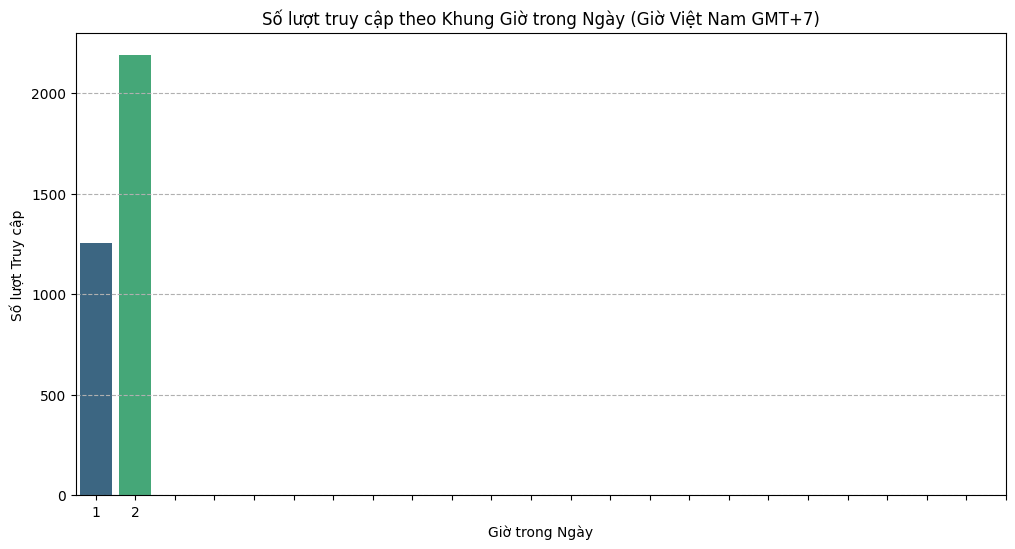

In [14]:
# Visualize hourly clicks
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")
plt.title('Số lượt truy cập theo Khung Giờ trong Ngày (Giờ Việt Nam GMT+7)')
plt.xlabel('Giờ trong Ngày')
plt.ylabel('Số lượt Truy cập')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.show()

### Có mối tương quan giữa thời điểm tạo link (hc) và thời điểm click (t) không?

- Kiểm tra hai cột t và hc

In [38]:
frame["t"] 

0       1.331923e+09
1       1.331923e+09
2       1.331923e+09
3       1.331923e+09
4       1.331923e+09
            ...     
3555    1.331927e+09
3556    1.331927e+09
3557    1.331927e+09
3558    1.331927e+09
3559    1.331927e+09
Name: t, Length: 3560, dtype: float64

In [39]:
frame['hc']

0       1.331823e+09
1       1.308262e+09
2       1.331920e+09
3       1.331923e+09
4       1.273672e+09
            ...     
3555    1.301298e+09
3556    1.307530e+09
3557    1.308262e+09
3558    1.327529e+09
3559    1.312898e+09
Name: hc, Length: 3560, dtype: float64

Tạo DataFrame mới time_diff_df, loại bỏ các hàng có giá trị thiếu (NaN) ở cột 't' và 'hc'. .copy() đảm bảo DataFrame mới độc lập.

In [ ]:
# Xóa các dòng mà cột 't' hoặc 'hc' có giá trị NaN
time_diff_df = frame.dropna(subset=['t', 'hc']).copy()

In [ ]:
# Tính toán khoảng thời gian (tính bằng giây) từ lúc tạo link (hc) đến lúc click (t) và lưu vào cột mới time_to_click_sec.
time_diff_df['time_to_click_sec'] = time_diff_df['t'] - time_diff_df['hc']

In [32]:
time_diff_df['time_to_click_sec'] 

0         100329.0
1       23660856.0
2           3309.0
3            181.0
4       58250840.0
           ...    
3555    30628362.0
3556    24396597.0
3557    23664453.0
3558     4398320.0
3559    19029179.0
Name: time_to_click_sec, Length: 3440, dtype: float64

In [ ]:
# Loại bỏ các hàng có giá trị time_to_click_sec âm (thời gian click trước thời gian tạo, có thể do lỗi dữ liệu).
time_diff_df = time_diff_df[time_diff_df['time_to_click_sec'] >= 0]

In [ ]:
# Chuyển đổi khoảng thời gian từ giây (cột time_to_click_sec) sang định dạng Timedelta (ví dụ: "X days HH:MM:SS") dễ đọc hơn, lưu vào cột time_to_click.
time_diff_df['time_to_click'] = pd.to_timedelta(time_diff_df['time_to_click_sec'], unit='s')

In [35]:
# Get descriptive statistics
print("Thống kê thời gian từ lúc tạo link đến lúc click:")
print(time_diff_df['time_to_click'].describe())

Thống kê thời gian từ lúc tạo link đến lúc click:
count                           3440
mean     136 days 12:42:39.903197674
std      220 days 05:45:22.315187212
min                  0 days 00:00:09
25%           0 days 03:58:54.250000
50%          13 days 19:26:53.500000
75%         143 days 01:57:30.250000
max               1150 days 06:42:51
Name: time_to_click, dtype: object


- Phân tích thống kê:
    + Có 3440 lượt click hợp lệ (đã loại bỏ NaN và giá trị âm)
    + Thời gian trung bình từ lúc tạo đến lúc click là khoảng 136.5 ngày
    + Độ lệch chuẩn rất lớn (220 ngày), cho thấy sự biến động cao
    + Thời gian click nhanh nhất là 9 giây sau khi tạo
    + 25% lượt click xảy ra trong vòng chưa đầy 4 giờ
    + 50% lượt click (trung vị) xảy ra trong vòng khoảng 13.8 ngày
    + 75% lượt click xảy ra trong vòng 143 ngày
    + Thời gian để một link được click lâu nhất là ~3 năm
- Sự chênh lệch Mean vs Median (50%): Giá trị trung bình (mean ≈ 136.5 ngày) lớn hơn rất nhiều so với trung vị (median ≈ 13.8 ngày). Điều này cho thấy phân phối thời gian bị lệch phải (right-skewed). Có một số lượng đáng kể các link được click sau một thời gian rất dài (như giá trị max), kéo giá trị trung bình lên cao. Trung vị cho thấy một nửa số lượt click xảy ra tương đối nhanh hơn (trong vòng khoảng 2 tuần).
- Độ lệch chuẩn (std): Giá trị std (220 ngày) còn lớn hơn cả giá trị trung bình, khẳng định sự phân tán rất rộng của dữ liệu. Thời gian chờ click rất khác nhau giữa các link.

In [36]:
# Visualize the distribution (using seconds for histogram might be skewed, let's try hours)
time_diff_df['time_to_click_hours'] = time_diff_df['time_to_click_sec'] / 3600

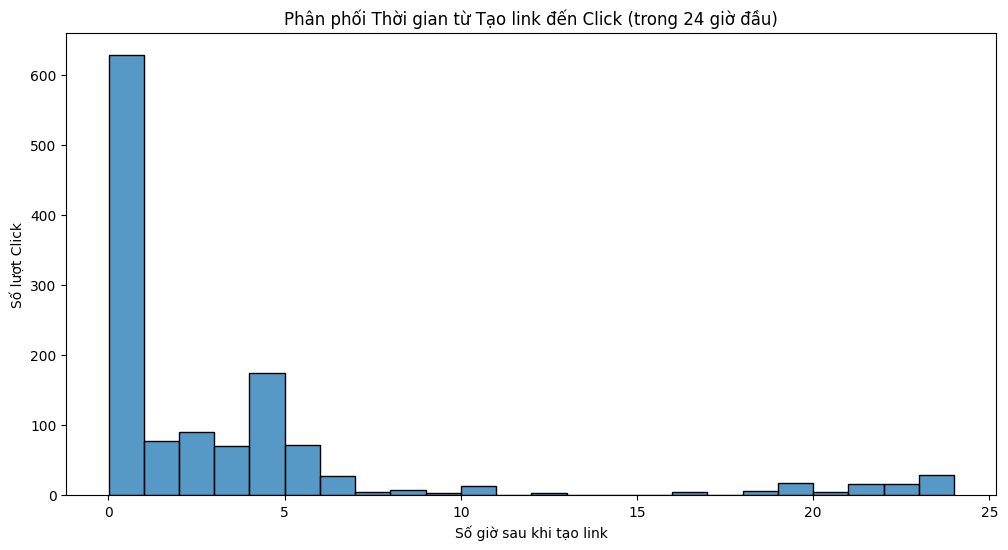

In [37]:
plt.figure(figsize=(12, 6))
# Plotting distribution for links clicked within, say, 24 hours for better visibility
sns.histplot(time_diff_df[time_diff_df['time_to_click_hours'] <= 24]['time_to_click_hours'], bins=24, kde=False)
plt.title('Phân phối Thời gian từ Tạo link đến Click (trong 24 giờ đầu)')
plt.xlabel('Số giờ sau khi tạo link')
plt.ylabel('Số lượt Click')
plt.show()

- Biểu đồ Histogram: trực quan hóa phân phối trong 24 giờ đầu tiên:
    + Tập trung ở giờ đầu: Cột cao nhất nằm ở khoảng 0-1 giờ sau khi link được tạo. Điều này cho thấy rất nhiều lượt click xảy ra gần như ngay lập tức sau khi link được tạo và chia sẻ.
    + Giảm dần: Số lượt click giảm nhanh chóng trong các giờ tiếp theo.
    + Đuôi dài (Long Tail): Mặc dù biểu đồ chỉ hiển thị 24 giờ, kết quả describe() (với max là 1150 ngày) cho thấy phân phối này có một "đuôi" rất dài, tức là vẫn có lượt click xảy ra sau nhiều ngày, nhiều tháng, thậm chí nhiều năm.


## Phân tích Địa lý

### Người dùng từ ngoài nước Mỹ (c != 'US') chiếm bao nhiêu phần trăm?

- Kiểm tra dữ liệu cột

In [44]:
frame['c'].head()

0    US
1    US
2    US
3    BR
4    US
Name: c, dtype: object

In [ ]:
frame['c'].isna().sum()

np.int64(641)

In [40]:
# Clean the country column 'c' similar to 'tz'
frame['clean_c'] = frame['c'].fillna('Unknown')
frame['clean_c'][frame['clean_c'] == ''] = 'Unknown'

C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\3014534758.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  frame['clean_c'][frame['clean_c'] == ''] = 'Unknown'
C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\3014534758.py:3: SettingW

In [41]:
# Count total valid entries (excluding 'Unknown') vs non-US entries
total_known_country = frame[frame['clean_c'] != 'Unknown'].shape[0]
us_users = frame[frame['clean_c'] == 'US'].shape[0]
non_us_users = total_known_country - us_users

In [42]:
if total_known_country > 0:
    percent_non_us = (non_us_users / total_known_country) * 100
    print(f"Tổng số lượt truy cập có thông tin quốc gia: {total_known_country}")
    print(f"Số lượt truy cập từ Mỹ (US): {us_users}")
    print(f"Số lượt truy cập từ ngoài nước Mỹ: {non_us_users}")
    print(f"Tỷ lệ người dùng từ ngoài nước Mỹ: {percent_non_us:.2f}%")
else:
    print("Không có dữ liệu quốc gia hợp lệ để tính toán tỷ lệ.")

Tổng số lượt truy cập có thông tin quốc gia: 2919
Số lượt truy cập từ Mỹ (US): 2305
Số lượt truy cập từ ngoài nước Mỹ: 614
Tỷ lệ người dùng từ ngoài nước Mỹ: 21.03%


- Mỹ chiếm đa số: Trong số 2919 lượt truy cập có thông tin quốc gia hợp lệ, có tới 2305 lượt đến từ Hoa Kỳ ('US'). Điều này hoàn toàn dễ hiểu vì đây là dữ liệu từ trang usa.gov.
- Tỷ lệ truy cập quốc tế: Người dùng từ ngoài nước Mỹ chiếm khoảng 21.03% (614 lượt). Đây là một tỷ lệ đáng kể, cho thấy thông tin từ chính phủ Mỹ cũng thu hút sự quan tâm của người dùng quốc tế.

In [43]:
# Optionally, view the top non-US countries
top_non_us_countries = frame[frame['clean_c'] != 'US'][frame['clean_c'] != 'Unknown']['clean_c'].value_counts().head(10)
print("\nTop 10 quốc gia (ngoài Mỹ) có lượt truy cập:")
print(top_non_us_countries)


Top 10 quốc gia (ngoài Mỹ) có lượt truy cập:
clean_c
GB    74
CA    60
ES    37
JP    37
BR    35
DE    28
IT    27
NL    22
MX    19
PL    16
Name: count, dtype: int64


C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\3098470023.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_non_us_countries = frame[frame['clean_c'] != 'US'][frame['clean_c'] != 'Unknown']['clean_c'].value_counts().head(10)


- Top quốc gia ngoài Mỹ:
    + Vương quốc Anh (GB) và Canada (CA) là hai quốc gia dẫn đầu với số lượt truy cập cao nhất từ bên ngoài Hoa Kỳ (74 và 60 lượt). Điều này có thể phản ánh mối quan hệ gần gũi về văn hóa, kinh tế hoặc ngôn ngữ.
    + Các quốc gia khác trong top 10 bao gồm Tây Ban Nha (ES), Nhật Bản (JP), Brazil (BR), Đức (DE), Ý (IT), Hà Lan (NL), Mexico (MX) và Ba Lan (PL).
    + Sự hiện diện của các quốc gia từ nhiều châu lục (Châu Âu, Bắc Mỹ, Nam Mỹ, Châu Á) cho thấy sự quan tâm đa dạng trên toàn cầu.

### Những bang (gr) hoặc thành phố (cy) nào có lượng truy cập lớn nhất?

In [ ]:
# Đếm những bang (gr) hoặc thành phố (cy) có lượng truy cập lớn nhất
top_regions = frame['gr'].dropna().value_counts().head(10)

In [47]:
print("Top 10 Bang/Vùng (gr) có lượng truy cập cao nhất:")
print(top_regions)

Top 10 Bang/Vùng (gr) có lượng truy cập cao nhất:
gr
CA    279
NY    204
TX    140
UT    133
MA    121
FL    118
GA    108
VA    108
DC     98
MD     95
Name: count, dtype: int64


- Top 10 bang/ vùng có lượng truy cập cao nhất:
    + CA: California là bang có lượng truy cập cao nhất với 279 lượt, bỏ khá xa các bang còn lại.
    + NY: New York đứng thứ hai với 204 lượt.
- Các bang tiếp theo như Texas (TX), Utah (UT), và Massachusetts (MA) cũng có lượng truy cập đáng kể (trên 120 lượt).
    + TX: Texas 
    + UT: Utah
    + MA: Massachusetts
    + FL: Florida
- Và các ban có lượt truy cập ít hơn
    + GA: Georgia
    + VA: Virginia
    + DC: District of Columbia
    + MD: Maryland
> Danh sách top 10 cho thấy sự quan tâm đến thông tin usa.gov tập trung ở các bang đông dân hoặc có các trung tâm công nghệ/chính trị lớn (như CA, NY, TX, DC, MA, VA).

C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\3116297028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_regions.index, x=top_regions.values, palette="magma")


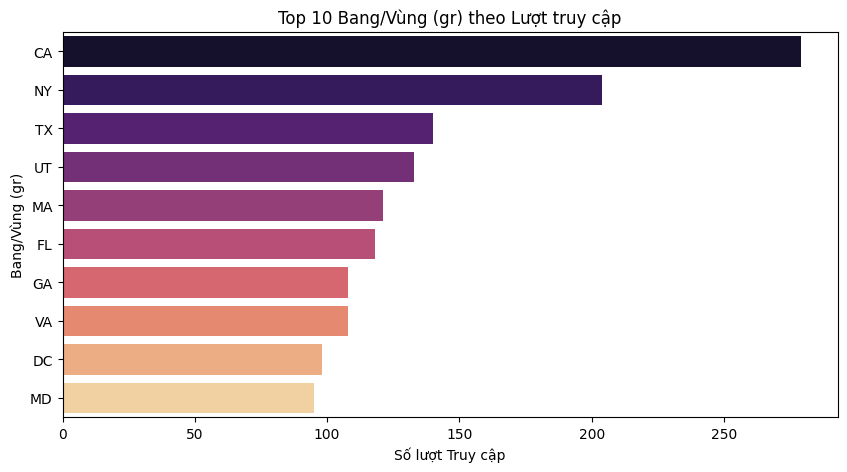

In [48]:
# Visualize Top Regions
plt.figure(figsize=(10, 5))
sns.barplot(y=top_regions.index, x=top_regions.values, palette="magma")
plt.title('Top 10 Bang/Vùng (gr) theo Lượt truy cập')
plt.xlabel('Số lượt Truy cập')
plt.ylabel('Bang/Vùng (gr)')
plt.show()

In [49]:
# Top Cities (cy)
top_cities = frame['cy'].dropna().value_counts().head(10)

In [50]:
print("\nTop 10 Thành phố (cy) có lượng truy cập cao nhất:")
print(top_cities)


Top 10 Thành phố (cy) có lượng truy cập cao nhất:
cy
Provo           121
White Plains    104
Washington       98
Palo Alto        68
Shrewsbury       46
Acworth          38
Dallas           33
Paramus          32
Nogata           29
Los Angeles      28
Name: count, dtype: int64


- Top 10 thành phố:
    + Provo: Likely Provo, Utah Provo là thành phố có lượng truy cập cao nhất với 121 lượt, chiếm phần lớn số lượt truy cập từ bang Utah (UT: 133). 
    + White Plains: Likely White Plains, New York đứng thứ hai với 104 lượt, cũng chiếm một phần đáng kể của bang New York (NY: 204).
    + Washington: Washington D.C. đứng thứ ba với 98 lượt, tương ứng với số lượt của DC trong top 10 bang.
- Các thành phố khác như Palo Alto (California) và Shrewsbury (Massachusetts) cũng nằm trong top 5, tương ứng với các bang có lượng truy cập cao.
    + Palo Alto: Likely Palo Alto, California
    + Shrewsbury: Likely Shrewsbury, Massachusetts
    + Acworth: Likely Acworth, Georgia
    + Dallas: Likely Dallas, Texas
    + Paramus: Likely Paramus, New Jersey (NJ không trong top 10 bang)
    + Nogata: Could be Nogata, Japan (JP) or misspelled/unclear sự xuất hiện khá lạ về lượt truy cập này là của Nhật bản.
    + Los Angeles: Los Angeles, California

- Top 10 bang/ vùng có lượng truy cập cao nhất:
    + CA: California là bang có lượng truy cập cao nhất với 279 lượt, bỏ khá xa các bang còn lại.
    + NY: New York
    + TX: Texas
    + UT: Utah
    + MA: Massachusetts
    + FL: Florida
    + GA: Georgia
    + VA: Virginia
    + DC: District of Columbia
    + MD: Maryland

C:\Users\kn260\AppData\Local\Temp\ipykernel_11884\3989916683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette="magma")


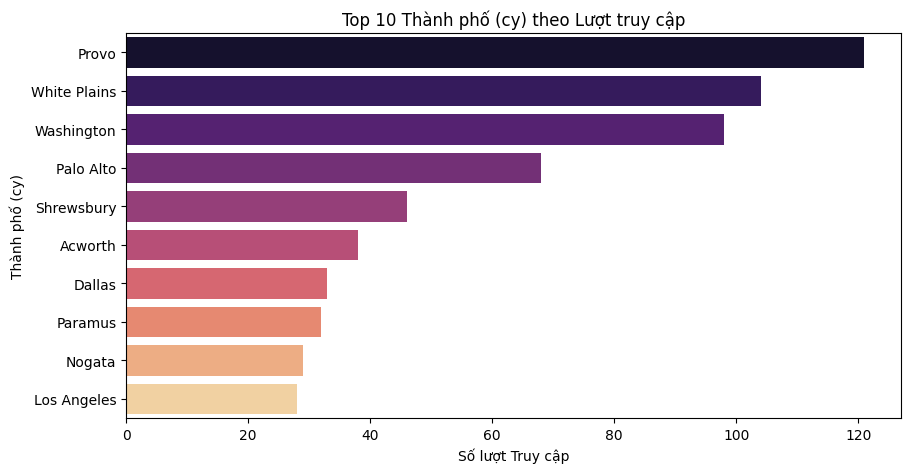

In [51]:
# Visualize Top Cities
plt.figure(figsize=(10, 5))
sns.barplot(y=top_cities.index, x=top_cities.values, palette="magma")
plt.title('Top 10 Thành phố (cy) theo Lượt truy cập')
plt.xlabel('Số lượt Truy cập')
plt.ylabel('Thành phố (cy)')
plt.show()

## Phân tích Nguồn truy cập (Referrer)

### Có sự khác biệt referrer theo hệ điều hành?

In [ ]:
ref_os_r = frame # Giả sử frame là DataFrame đã được định nghĩa trước đó

In [ ]:
ref_os_r['domain'] = ref_os_r['r'].apply(get_domain) # Trích xuất tên miền từ cột 'r' và lưu vào cột mới 'domain'

In [ ]:
ref_os_r["os"] = np.where(ref_os_r["a"].str.contains("Windows"),
                        "Windows", "Not Windows") # Phân loại hệ điều hành thành "Windows" và "Not Windows"
ref_os_r["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [ ]:
ref_os_r = ref_os_r.fillna({"os": "unknown", "domain": "unknown"}) # Điền giá trị "unknown" cho các ô NaN trong cột 'os' và 'domain'

In [31]:
ref_os_r['os']

0           Windows
1       Not Windows
2           Windows
3       Not Windows
4           Windows
           ...     
3555        Windows
3556        Windows
3557    Not Windows
3558    Not Windows
3559        Windows
Name: os, Length: 3560, dtype: object

In [ ]:
result = ref_os_r.groupby(["domain", "os"]).size().unstack(fill_value=0) # Nhóm theo 'domain' và 'os', đếm số lượng, điền giá trị 0 cho các ô trống

In [33]:
result

os,Not Windows,Windows
domain,,
1.usa.gov,0,1
36ohk6dgmcd1n-c.c.yom.mail.yahoo.net,0,4
AwareMap.com,121,0
Invalid/Other,0,120
aashtojournal.org,0,21
...,...,...
www2.carilion.com,0,1
yandex.ru,0,23
yourlife.usatoday.com,0,1


In [44]:
ref_os_r["domain"].isnull().sum()

np.int64(0)

In [45]:
ref_os_r['os'].isnull().sum()

np.int64(0)

In [42]:
ref_os_pivot = ref_os_r.pivot_table(
    index="domain", 
    columns="os", 
    aggfunc="size", 
    fill_value=0
)

ref_os_pivot.sort_values(by="Windows", ascending=False).head(10)


os,Not Windows,Windows
domain,,
direct,501,1084
facebook.com,152,396
twitter.com,346,331
Invalid/Other,0,120
shrewsbury-ma.gov,12,78
google.com,15,32
togetter.com,0,29
yandex.ru,0,23
aashtojournal.org,0,21


- Có sự khác biệt rõ ràng giữa referrer theo hệ điều hành:
    + Windows users truy cập từ facebook.com, direct, google.com, các domain lạ (Invalid/yandex/etc) nhiều hơn hẳn.
    + Non-Windows users lại thích Twitter hơn — Twitter có 346 so với 331, đây là điểm ngược chiều so với các domain khác.
    + Nhiều referrer chỉ tồn tại trên Windows (Invalid/Other, togetter.com, yandex.ru,...)
- Về hành vi người dùng:
    + Windows có xu hướng là desktop → người dùng hay gõ/remove ref trực tiếp (direct) + click từ Facebook nhiều.
    + Non-Windows có thể là mobile/iOS/Linux/Mac → Twitter chiếm ưu thế (hợp với thói quen mobile).


### Có sự khác biệt referrer theo múi giờ không?

In [72]:
frame['r']

0                              http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf
1                                                          http://www.AwareMap.com/
2                                                              http://t.co/03elZC4Q
3                                                                            direct
4                                               http://www.shrewsbury-ma.gov/selco/
                                           ...                                     
3555                                                                         direct
3556    http://www.facebook.com/l.php?u=http%3A%2F%2F1.usa.gov%2FjQLtP4&h=3AQF8AIR_
3557                                                       http://www.AwareMap.com/
3558                                                                         direct
3559                                                           http://t.co/OEEEvwjU
Name: r, Length: 3560, dtype: object

In [73]:
ref_tz['r'] = frame['r']

In [74]:
ref_tz['tz'] = frame["tz"]

In [75]:
ref_tz['tz'] = ref_tz["tz"].fillna("Missing")

In [76]:
ref_tz['domain'] = ref_tz['r'].apply(get_domain)

In [64]:
ref_tz['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [77]:
ref_tz['domain']

0              facebook.com
1              AwareMap.com
2               twitter.com
3                    direct
4         shrewsbury-ma.gov
                ...        
3558                 direct
3559            twitter.com
r             Invalid/Other
tz            Invalid/Other
domain        Invalid/Other
Name: domain, Length: 3563, dtype: object

In [78]:
ref_tz = pd.DataFrame(ref_tz)

In [79]:
ref_tz['domain']

0              facebook.com
1              AwareMap.com
2               twitter.com
3                    direct
4         shrewsbury-ma.gov
                ...        
3558                 direct
3559            twitter.com
r             Invalid/Other
tz            Invalid/Other
domain        Invalid/Other
Name: domain, Length: 3563, dtype: object

In [80]:
ref_tz_pivot = ref_tz.pivot_table(
    index="domain",
    columns="tz",
    aggfunc="size",
    fill_value=0
)

ref_tz_pivot.head(10)


tz,,Africa/Cairo,Africa/Casablanca,Africa/Ceuta,Africa/Johannesburg,Africa/Lusaka,America/Anchorage,America/Argentina/Buenos_Aires,America/Argentina/Cordoba,America/Argentina/Mendoza,...,Europe/Stockholm,Europe/Uzhgorod,Europe/Vienna,Europe/Vilnius,Europe/Volgograd,Europe/Warsaw,Europe/Zurich,Missing,Pacific/Auckland,Pacific/Honolulu
domain,,,,,,,,,,,,,,,,,,,,,
1.usa.gov,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36ohk6dgmcd1n-c.c.yom.mail.yahoo.net,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AwareMap.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Invalid/Other,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,123,0,0
aashtojournal.org,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abclocal.go.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addins.kwwl.com,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addins.wrex.com,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agency.governmentjobs.com,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tz_clicks = ref_tz.groupby("tz")["domain"].value_counts().reset_index(name="count")
# sắp xếp theo tz có tổng lượt cao nhất
tz_total = tz_clicks.groupby("tz")["count"].sum().sort_values(ascending=False)
print(tz_total.head())


tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64


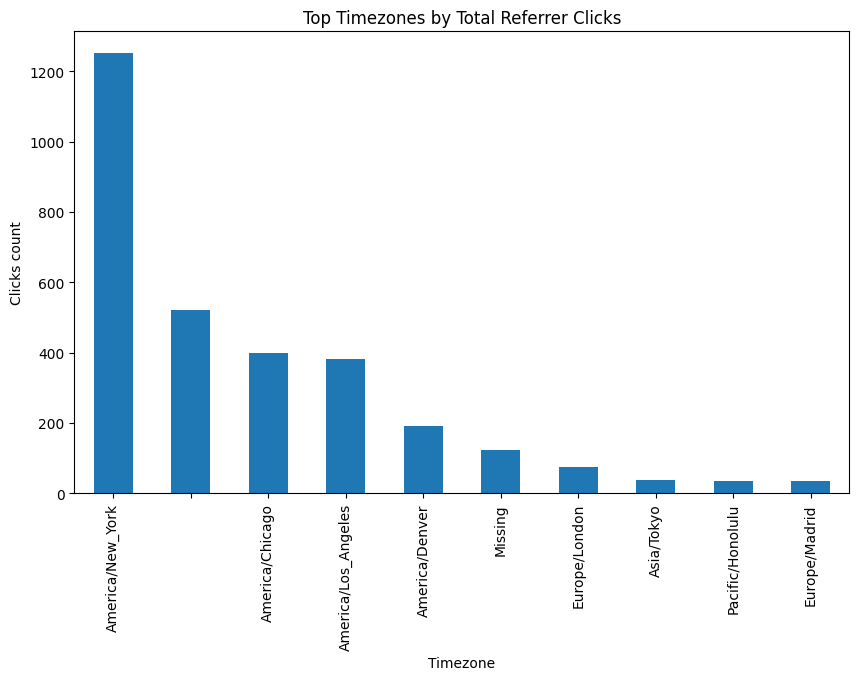

In [83]:
import matplotlib.pyplot as plt

tz_total = ref_tz.groupby("tz")["domain"].count().sort_values(ascending=False)

tz_total.head(10).plot(kind="bar")  # lấy top 10 tz
plt.title("Top Timezones by Total Referrer Clicks")
plt.ylabel("Clicks count")
plt.xlabel("Timezone")
plt.show()


- Sự khác biệt về referrer và múi giờ khá đáng kể:
    + Lượng click từ referrer (nguồn truy cập) không phân bố đều giữa các múi giờ, mà tập trung mạnh vào một số khu vực nhất định.
    + America/New_York ~1250 Vượt trội, chiếm phần lớn, đây là múi giờ miền Đông Hoa Kỳ — hoạt động cao nhất.
    + America/Chicago / Los_Angeles 400–500 Cũng mạnh nhưng thấp hơn khá nhiều, đại diện cho miền Trung, Tây Mỹ.
    + 2 cột dữ liệu missing Có khả năng do lỗi thông tin TZ, khá đáng kể.
> Referrer hoạt động mạnh nhất ở các múi giờ Bắc Mỹ (đặc biệt là Eastern Time – America/New_York). Các khu vực châu Âu và châu Á truy cập thấp hơn rất nhiều. Điều này cho thấy người dùng mục tiêu rõ ràng nghiêng về khu vực US, không phân bố toàn cầu.

# Kết thúc